# empiricaldist plotting functions

Copyright 2019 Allen Downey

BSD 3-clause license: https://opensource.org/licenses/BSD-3-Clause

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from empiricaldist import Hist

In [3]:
hist = Hist.from_seq([1, 2, 2, 4, 5])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


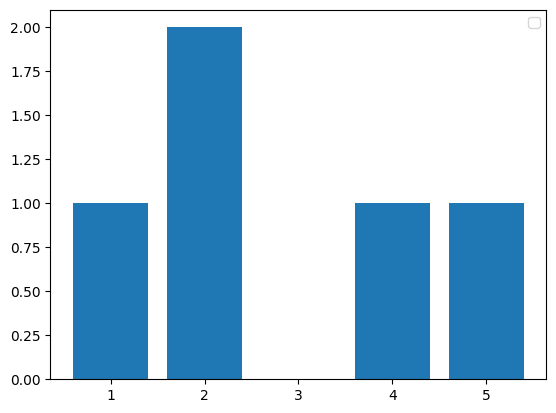

In [4]:
hist.bar()
plt.legend();

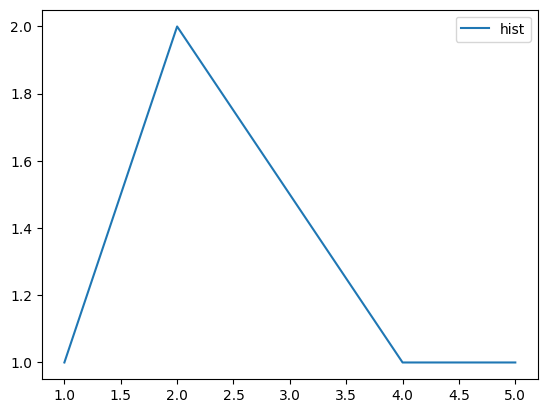

In [5]:
hist.plot(label='hist')
plt.legend();

In [6]:
from empiricaldist import Pmf

In [7]:
pmf = Pmf.from_seq([1, 2, 2, 4, 5], name='example')

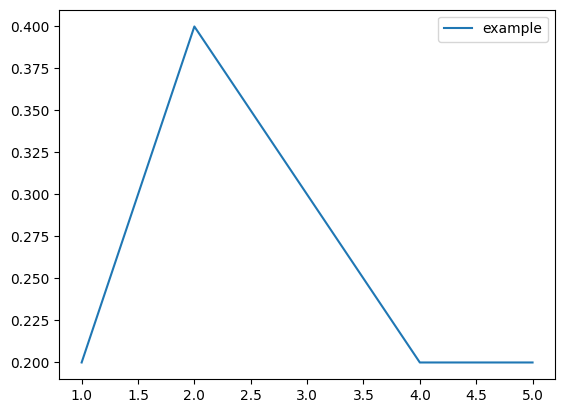

In [8]:
pmf.plot()
plt.legend();

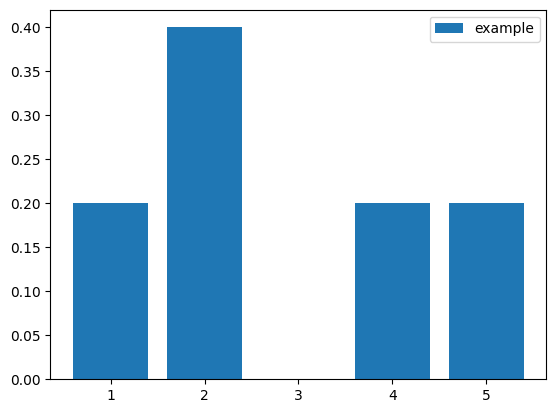

In [9]:
pmf.bar()
plt.legend();

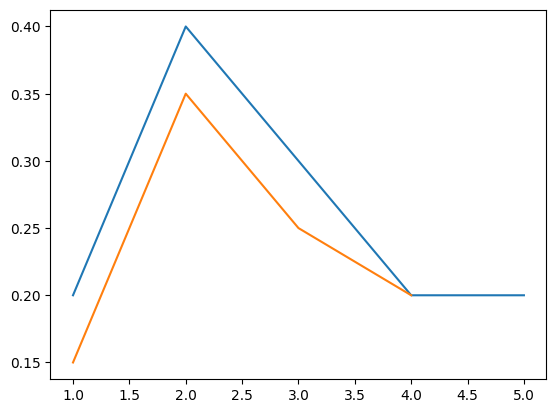

In [10]:
xs = [1, 2, 3, 4]
ys = [0.15, 0.35, 0.25, 0.2]

pmf.plot()

plt.plot(xs, ys)

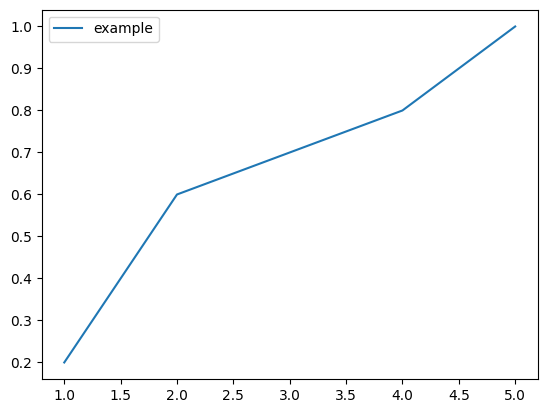

In [11]:
cdf = pmf.make_cdf()
cdf.plot()
plt.legend();

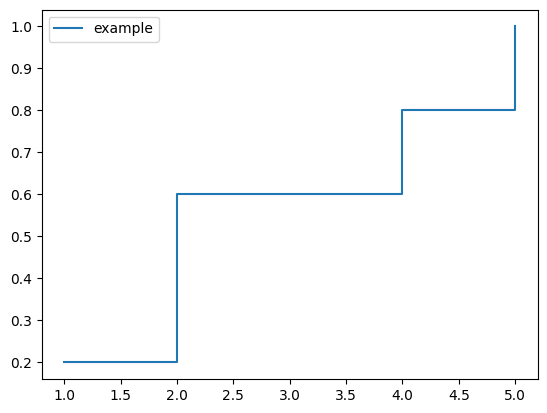

In [12]:
cdf.step()
plt.legend();

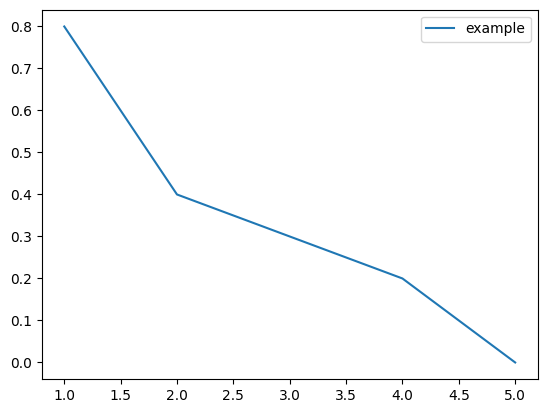

In [13]:
surv = cdf.make_surv()
surv.plot()
plt.legend();

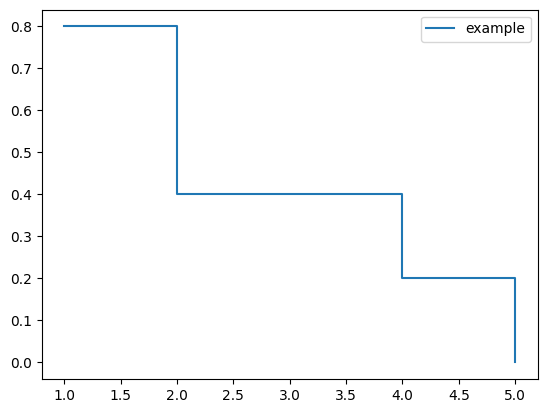

In [14]:
surv = cdf.make_surv()
surv.step()
plt.legend();

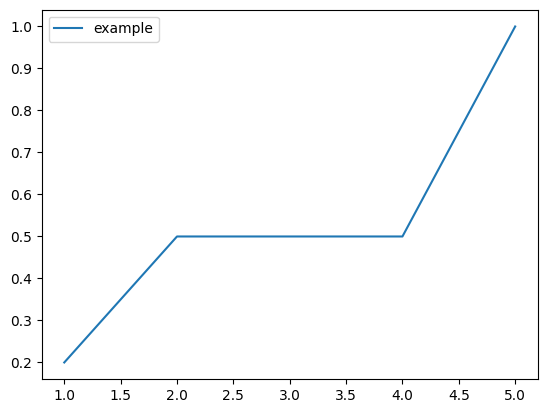

In [15]:
haz = surv.make_hazard()
haz.plot()
plt.legend();

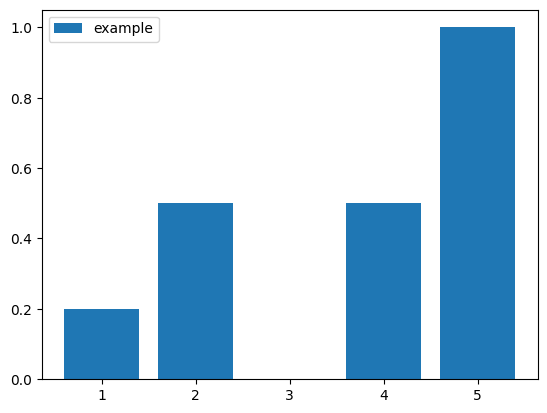

In [16]:
haz.bar()
plt.legend();

## Replicating a problem with plotting Pmfs

In [17]:
unbiased = np.array([ 5,  6, 12,  7,  8,  6,  6,  9,  8,  4,  3,  5,  5,  7,  5,  7,  4,
        4,  3,  6,  3,  5, 10,  1,  7,  4,  8,  2,  9,  6,  5,  5,  9, 11,
       11,  3,  9,  1, 10,  1,  6,  6,  5,  8,  7,  7,  4,  7,  2,  1,  3,
        1,  6,  3,  1,  1,  2,  2,  1,  2,  2,  1])

In [18]:
pmf = Pmf.from_seq(unbiased)

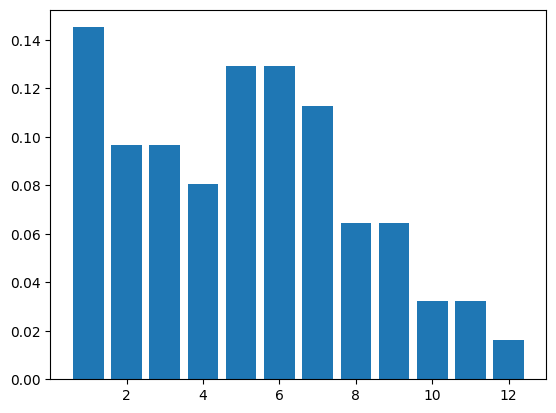

In [19]:
pmf.bar(label='')

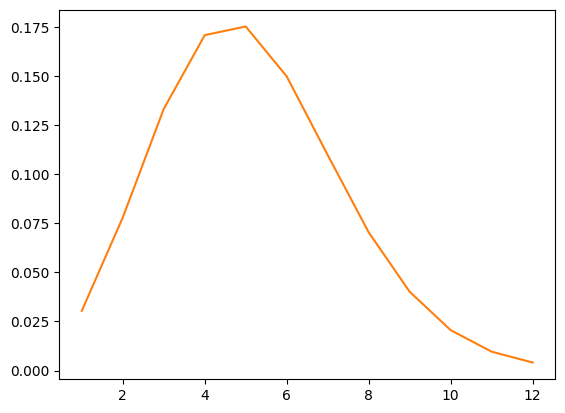

In [20]:
from scipy.stats import poisson

mean = np.mean(unbiased)

qs = np.arange(1, 13)
ps = poisson.pmf(qs, mean)
plt.plot(qs, ps, color='C1', label='model')

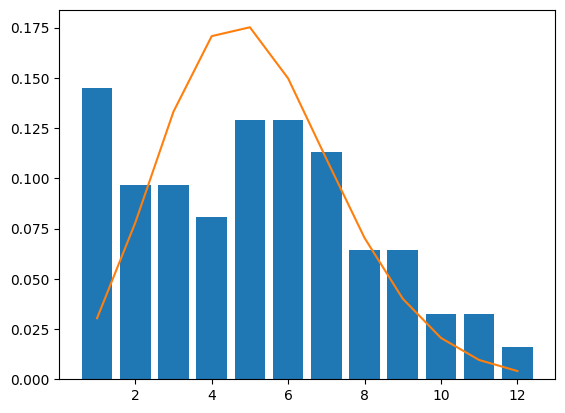

In [21]:
pmf.bar()
plt.plot(qs, ps, color='C1', label='model')

# Replicating another problem

In [22]:
!wget https://github.com/AllenDowney/DataScience/raw/master/data/ANSURIIFEMALEPublic.csv

--2024-07-08 14:07:52--  https://github.com/AllenDowney/DataScience/raw/master/data/ANSURIIFEMALEPublic.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/DataScience/master/data/ANSURIIFEMALEPublic.csv [following]
--2024-07-08 14:07:52--  https://raw.githubusercontent.com/AllenDowney/DataScience/master/data/ANSURIIFEMALEPublic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 976573 (954K) [text/plain]
Saving to: ‘ANSURIIFEMALEPublic.csv.2’

ANSURIIFEMALEPublic 100%[===================>] 953.68K  --.-KB/s    in 0.07s   

2024-07-08 14:07:52 (13.9 MB/s) - ‘ANSURIIFEMALEPublic.csv.

In [23]:
ansur_female = pd.read_csv("ANSURIIFEMALEPublic.csv", encoding="ISO-8859-1")


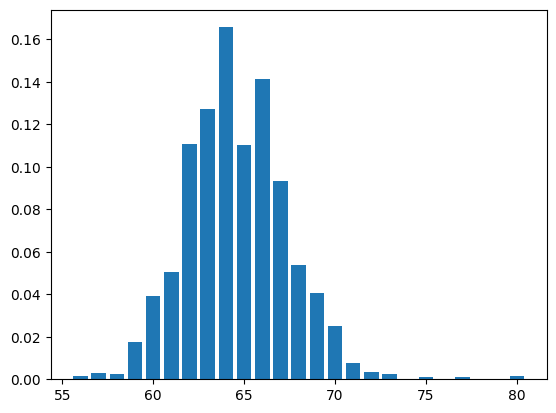

In [24]:
from empiricaldist import Pmf

pmf_height = Pmf.from_seq(ansur_female["Heightin"])
pmf_height.bar()